### 演習 以下のデータを取り込み、非線形回帰を実施し、パラメタを推定しなさい。ただし、回帰式は以下のものを用いること。
$y(t) = \frac{k}{{1 + me^{-\alpha t}}}$
ここで、$t$はデータ中のtime列、$y(t)$はvalue列を使う。パラメタは$k, m, \alpha$である。

### GPT プロンプト
* 'nonlinear.csv' ファイルを読み込み、データフレームdfに格納する
* モデル関数 $y(t) = \frac{k}{{1 + me^{-\alpha t}}}$ を定義する。この関数は非線形モデルの形式を持ち、パラメータ $k$, $m$, $\alpha$ を持つ。
* データフレーム dfから説明変数 time を取得し、目的変数 value を取得する。
* 非線形回帰を実行し、推定されたパラメータ $k_{\text{est}}$, $m_{\text{est}}$, $\alpha_{\text{est}}$ を得て、結果を表示する。
* 推定されたパラメータを使用して、モデル関数から予測値を生成する。
* scipyを利用する
* 実際のデータと回帰曲線をプロットする。
* 残差を計算し、残差プロットを作成する。
* 決定係数、自由度調整済み決定係数、RMSEを計算し、結果を表示する。
* Pythonコード

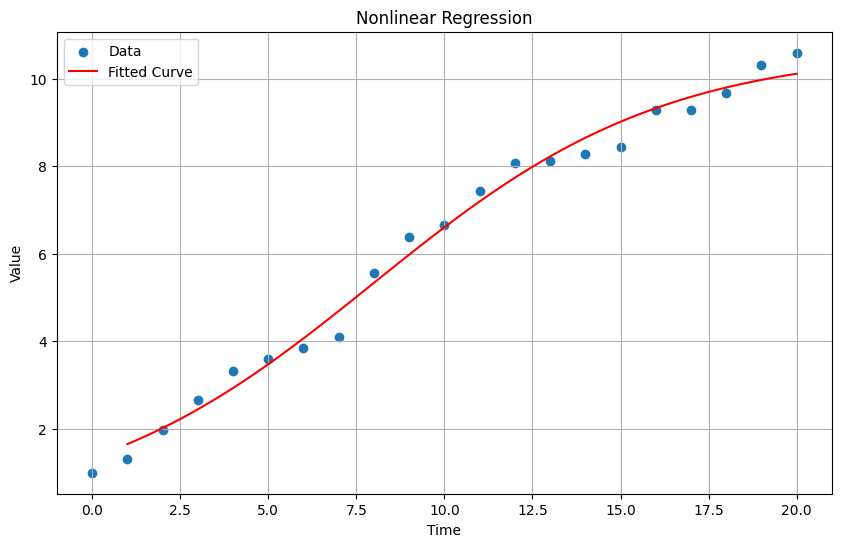

Estimated Parameters:
k: 10.659442144782425
m: 6.94749976948461
alpha: 0.24258475197038054


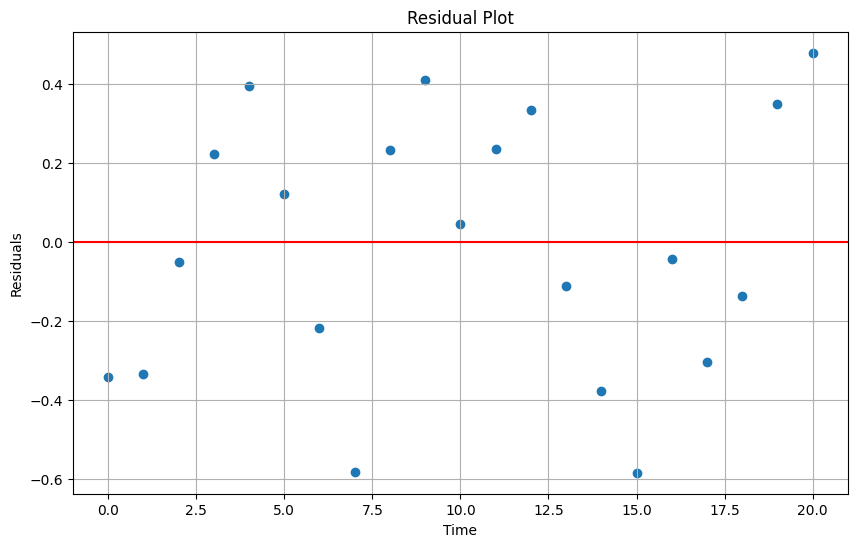

R-squared: 0.9885807433554629
RMSE: 0.32297693656801446
Adjusted R-squared: 0.9865655804181916


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# データを読み込む
df_nonlinear = pd.read_csv('nonlinear.csv')

# モデル関数を定義
def model_function(t, k, m, alpha):
    return k / (1 + m * np.exp(-alpha * t))

# 非線形回帰を実行
popt, pcov = curve_fit(model_function, df_nonlinear["time"], df_nonlinear["value"])

# 推定されたパラメータ
k_est, m_est, alpha_est = popt

# プロット用のデータを生成
t_values = np.linspace(1, 20, 100)
predicted_values = model_function(t_values, *popt)

# データと回帰曲線をプロット
plt.figure(figsize=(10, 6))
plt.scatter(df_nonlinear["time"], df_nonlinear["value"], label="Data")
plt.plot(t_values, predicted_values, color="red", label="Fitted Curve")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Nonlinear Regression")
plt.legend()
plt.grid(True)
plt.show()

print("Estimated Parameters:")
print("k:", k_est)
print("m:", m_est)
print("alpha:", alpha_est)

# 予測値を計算
time_range = np.linspace(0, 20, len(df_nonlinear))
predicted_values = k_est / (1 + m_est * np.exp(-alpha_est * time_range))

# 実際の値と予測値の残差を計算
residuals = df_nonlinear['value'] - predicted_values

# 残差プロットを作成
plt.figure(figsize=(10, 6))
plt.scatter(df_nonlinear['time'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 決定係数を計算
r_squared = r2_score(df_nonlinear['value'], predicted_values)
print('R-squared:', r_squared)

# RMSEの計算
rmse = np.sqrt(mean_squared_error(df_nonlinear['value'], predicted_values))
print('RMSE:', rmse)

# 自由度調整済み決定係数の再計算
n = len(df_nonlinear['value'])
p = len(popt)
adj_r_squared = 1 - (1-r_squared)*(n-1)/(n-p-1)
print('Adjusted R-squared:', adj_r_squared)

